In [14]:
import os
os.chdir("../")
import pandas as pd
import seaborn
import sklearn
import geopandas as gpd
import missingno as msno
import seaborn as sns
from preprocessing.preprocessing import standardize_education_level, standardize_date
from datetime import datetime
import numpy as np
from pathlib import Path

In [15]:
aggregated_file = str(Path.home())+"/aggregated_match_for_FSMS_files_with_yields_with_price.csv"
df_aggregated_file = pd.read_csv(aggregated_file, low_memory=False)
df_aggregated_file.drop(columns=["Unnamed: 0"], inplace=True)

In [16]:
columns = []
for col in df_aggregated_file.columns.to_list():
    new_col = col.replace("$","")
    columns.append(new_col)
df_aggregated_file.columns = columns

In [5]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_aggregated_file.dtypes)

## Study data types in columns

Columns are not homogenous. Let's find out which columns will have to be modified.

In [17]:
df_aggregated_file = df_aggregated_file.astype({'numquest': 'float64','ident': 'float64','enqu': 'category',
                                                'hors nk': 'category','moughataa': 'category','commune': 'category',
                                                'villag': 'category','village': 'category','milieu': 'category',
                                                'wilaya': 'category','latitude': 'float64','longitude': 'float64',
                                                'Altitude': 'float64','numen': 'float64','date': 'category',
                                                'cdatsaisie': 'category','code enq': 'category',
                                                'code cont': 'category','LHG': 'category','LHZ': 'category',
                                                'fcs': 'float64','csi': 'float64','Tot_source': 'float64',
                                                'per.source1': 'float64','per.source2': 'float64',
                                                'per.source3': 'float64','per.source4': 'float64',
                                                'per.source5': 'float64','per.source6': 'float64',
                                                'per.source7': 'float64','per.source8': 'float64',
                                                'per.source9': 'float64','per.source10': 'float64',
                                                'Q9_1': 'category','Q9_2': 'category','Q9_3': 'category',
                                                'Q9_4': 'category','Q9_5': 'category','Q9_6': 'category',
                                                'Q9_7': 'category','Q9_8': 'category','Q9_9_162': 'category',
                                                'Q9_9_163': 'category','Q9_9_164': 'category',
                                                'Q9_9_165': 'category','Q9_9_166': 'category',
                                                'Q9_9_167': 'category','Q9_9_168': 'category',
                                                'Q9_9_169': 'category','Q9_9': 'category',
                                                'Nb_hom': 'float64','Nb_fem': 'float64',
                                                'Rap_feminité': 'float64','Pc_fem': 'float64',
                                                'Dependant': 'float64','TxDep': 'float64','Equiv_ad': 'float64',
                                                'Tailmen': 'category','Q2_5': 'float64','HWDDS': 'float64',
                                                'Pondérations': 'float64','Extrap': 'float64','Trage1': 'category',
                                                'Trage2': 'category','Q2_1': 'category','Q2_2': 'float64',
                                                'Q2_3': 'category','Q2_4': 'category','Scol': 'category',
                                                'Path': 'category','year': 'int64','month': 'category',
                                                'groundnut': 'int64','millet': 'int64','sorghum': 'int64',
                                                'maize': 'int64','cowpea': 'int64','cowpea': 'int64',
                                                'id':'category','Beans (niebe) - Retail':'float64',
                                                'Couscous - Retail':'float64','Feed (flour) - Retail':'float64',
                                                'Feed (rakhel) - Retail':'float64',
                                                'Feed (wheat bran) - Retail':'float64',
                                                'Livestock (camel) - Retail':'float64',
                                                'Livestock (cattle) - Retail':'float64',
                                                'Livestock (goat, medium-sized male) - Retail':'float64',
                                                'Livestock (sheep, medium-sized castrated male) - Retail':'float64',
                                                'Maize (local) - Retail':'float64','Meat (beef) - Retail':'float64',
                                                'Meat (camel) - Retail':'float64','Milk (powder) - Retail':'float64',
                                                'Millet - Retail':'float64','Oil (vegetable) - Retail':'float64',
                                                'Pasta (macaroni) - Retail':'float64',
                                                'Rice (imported) - Retail':'float64',
                                                'Rice (local) - Retail':'float64',
                                                "Sorghum (r'haya) - Retail":'float64',
                                                'Sorghum (red) - Retail':'float64',
                                                'Sorghum (taghalit) - Retail':'float64',
                                                'Straw - Retail':'float64','Sugar - Retail':'float64',
                                                'Wheat - Retail':'float64','Wheat flour - Retail':'float64',
                                                'Wheat meal - Retail':'float64'})

In [18]:
df_aggregated_file = df_aggregated_file.drop(columns=["cdatsaisie"])
df_aggregated_file = df_aggregated_file.rename(columns={"id": "price_id"}) 
df_aggregated_file["Scol"]=standardize_education_level(df_aggregated_file["Scol"])
df_aggregated_file["date"] = df_aggregated_file["date"].apply(lambda row: standardize_date(row))
df_aggregated_file["date"] = pd.to_datetime(df_aggregated_file["date"], format="%Y-%m-%d", errors='coerce')

### Tailmen cleaning

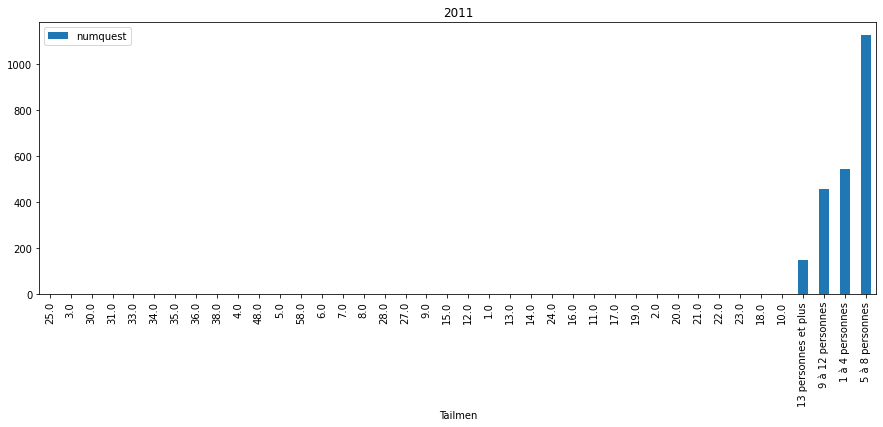

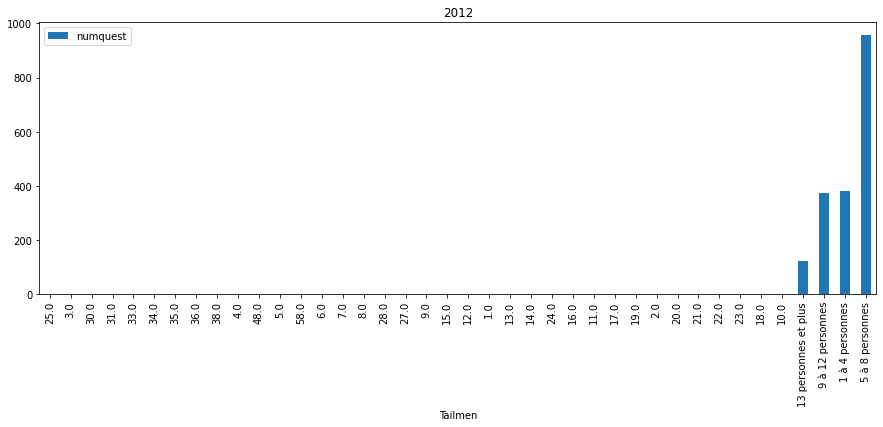

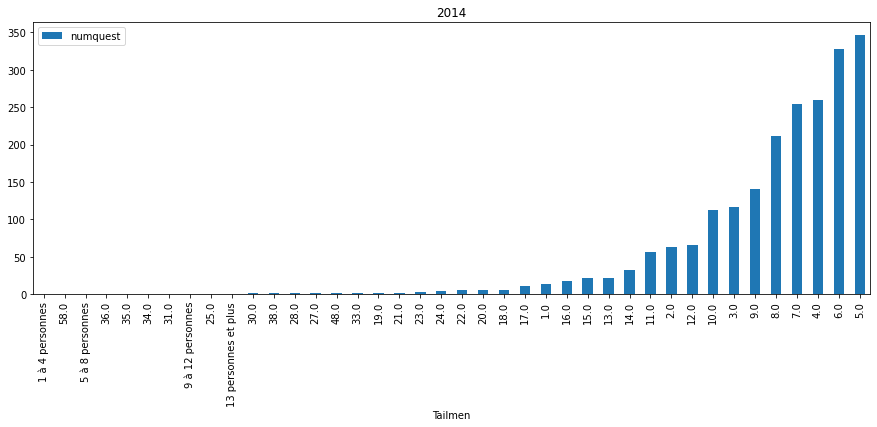

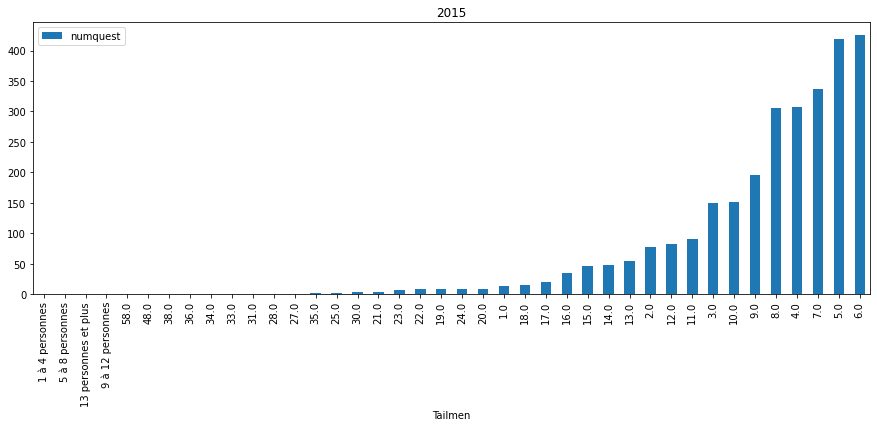

In [24]:
for year in df_aggregated_file["year"].unique():
    tmp_df = df_aggregated_file.loc[df_aggregated_file["year"]==year]
    tmp_df = pd.DataFrame(tmp_df.groupby("Tailmen").count()[["numquest"]]).sort_values(by=["numquest"])
    tmp_df.plot(kind='bar', figsize=(15, 5), title=year)

In [39]:
def standardize_tailmen(tailmen):
    if len(tailmen)<5:
        count_tailmen = float(tailmen)
        if count_tailmen < 5:
            return "1 à 4 personnes"
        elif count_tailmen < 9 and count_tailmen >= 5:
            return "5 à 8 personnes"
        elif count_tailmen < 13 and count_tailmen >= 9:
            return "9 à 12 personnes"
        else:
            return "13 personnes et plus"
    else:
        return tailmen

In [40]:
df_aggregated_file["Tailmen"] = df_aggregated_file["Tailmen"].apply(lambda row: standardize_tailmen(row))
df_aggregated_file["Tailmen"]

0            1 à 4 personnes
1           9 à 12 personnes
2            5 à 8 personnes
3            1 à 4 personnes
4           9 à 12 personnes
                ...         
9040         1 à 4 personnes
9041         5 à 8 personnes
9042    13 personnes et plus
9043         5 à 8 personnes
9044         5 à 8 personnes
Name: Tailmen, Length: 9045, dtype: object